### Experimental Design
#### 05th January 2022

In [1]:
import pandas as pd

import os

import datetime as dt

import numpy as np

import matplotlib.pyplot as plt

import random as rnd

plt.style.use('ggplot')

import time

import dataclasses

import seaborn as sns

import matplotlib as mpl

from pandas.core.common import SettingWithCopyWarning

import warnings

import matplotlib.ticker as tkr

In [2]:
import snowflake.connector
import sqlalchemy
from sqlalchemy import create_engine
from snowflake.sqlalchemy import URL

In [3]:
import json
from pandas.io.json import json_normalize

In [4]:
from matplotlib.backends.backend_pdf import PdfPages

In [5]:
url=(r'https://raw.githubusercontent.com/beccadsouza/Machine-Learning-Python/master/Datasets/height-weight.csv')
People = pd.read_csv(url)
People.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Gender  10000 non-null  object 
 1   Height  10000 non-null  float64
 2   Weight  10000 non-null  float64
dtypes: float64(2), object(1)
memory usage: 234.5+ KB


In [6]:
People.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [7]:
People.describe()

,Height,Weight
count,10000.000000,10000.000000
mean,66.367560,161.440357
std,3.847528,32.108439
min,54.263133,64.700127
25%,63.505620,135.818051
50%,66.318070,161.212928
75%,69.174262,187.169525
max,78.998742,269.989699


In [8]:
People.groupby(['Gender']).describe()

Height                                                        \
         count       mean       std        min        25%        50%   
Gender                                                                 
Female  5000.0  63.708774  2.696284  54.263133  61.894441  63.730924   
Male    5000.0  69.026346  2.863362  58.406905  67.174679  69.027709   

                              Weight                                     \
              75%        max   count        mean        std         min   
Gender                                                                    
Female  65.563565  73.389586  5000.0  135.860093  19.022468   64.700127   
Male    70.988744  78.998742  5000.0  187.020621  19.781155  112.902939   

                                                        
               25%         50%         75%         max  
Gender                                                  
Female  122.934096  136.117583  148.810926  202.237214  
Male    173.887767  187.033546  200.357802  269.989699

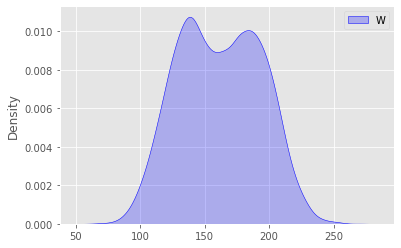

The sample mean is 161.44035683283076
Test 1: two sided [H_0: mean different than cut-off]: Reject the null. Mean value is different from cut-off.
Test 2: one sided [H_0: mean higher or equal than cut-off]: Fail to reject the null. Mean value is NON LOWER than cut-off.
Test 3: one sided [H_O: mean lower or equal than cut-off]: Reject the null. Mean value is HIGHER than cut-off.


In [296]:
#A. [One-sample two-sided t-test] - T-student
Sample_A=People.Weight.values
sns.kdeplot(Sample_A,shade=True,color='b')
plt.legend(('Weight'))
plt.show()

import scipy
from scipy import stats
#stats.ttest_1samp = T-test for the mean of ONE group of scores: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_1samp.html

#Premisser:
#1. A group of scores INDEPENDENTLY SAMPLED
#2. Sample mean != cut-off -> two tailed test

print("The sample mean is " + str(Sample_A.mean()))
cut_off=65
alpha=0.05


#TEST 1 ----ALTERNATIVE IS TWO SIDED
t_res=stats.ttest_1samp(Sample_A,cut_off)
Type_test="Test 1: two sided [H_0: mean different than cut-off]: "

if t_res[1]<alpha:
    print(str(Type_test)+ "Reject the null. Mean value is different from cut-off.")
else:
    print(str(Type_test)+ "Fail to reject the null. Mean value is NOT different from cut-off.")


#TEST 2 ----ALTERNATIVE IS ONE SIDED [LOWER]
t_res=stats.ttest_1samp(Sample_A,cut_off,alternative='less') #The alternative is that mean is lower than cut-off
Type_test='Test 2: one sided [H_0: mean higher or equal than cut-off]: '

if t_res[1]<alpha:
    print( str(Type_test)+ "Reject the null. Mean value is LOWER than cut-off.")
else:
    print(str(Type_test)+  "Fail to reject the null. Mean value is NON LOWER than cut-off.")


#TEST 3 ----ALTERNATIVE IS ONE SIDED [HIGHER]
t_res=stats.ttest_1samp(Sample_A,cut_off,alternative='greater') #The alternative is that mean is lower than cut-off
Type_test='Test 3: one sided [H_O: mean lower or equal than cut-off]: '

if t_res[1]<alpha:
    print( str(Type_test)+ "Reject the null. Mean value is HIGHER than cut-off.")
else:
    print(str(Type_test)+  "Fail to reject the null. Mean value is NON HIGHER than cut-off.")


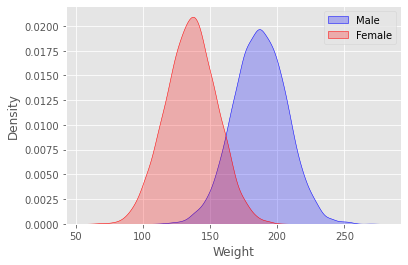

The mean weight in sample Male is 187.0206206581932
The mean weight in sample Female is 135.86009300746835
The var weight in sample Male is 391.2940740160849
The var weight in sample Female is 361.854281404399
Test 1: two sided, same variance [H_0: mean male = mean female]: Reject the null. Mean value is different across males and females.
Test 2: two sided, different variance [H_0: mean male = mean female]: Reject the null. Mean value is different across males and females.
Test 3: two sided, same variance [H_0: mean male <= mean female]: Reject the null. Mean value male is GREATER than mean value female.


In [10]:
#B. [Two-sample two-sided t-test]: Is the mean weight different across samples, given gender? - T-student
Target_variable='Weight'
Sample_A=People[People['Gender']=='Male'][Target_variable]
Sample_B=People[People['Gender']=='Female'][Target_variable]

sns.kdeplot(Sample_A,shade=True,color='b')
sns.kdeplot(Sample_B,shade=True,color='r')
plt.legend(('Male','Female'))
plt.show()

print("The mean weight in sample Male is " +str(Sample_A.mean()))
print("The mean weight in sample Female is " + str(Sample_B.mean()))


print("The var weight in sample Male is " +str(Sample_A.var()))
print("The var weight in sample Female is " + str(Sample_B.var()))

alpha=0.05

#Premisser:
# 1. The scores come from two independent distributions
# 2. Same variances, set equal_var=False if not.

#TEST 1 ----ALTERNATIVE IS TWO SIDED - EQUAL VARIANCE
t_res=stats.ttest_ind(Sample_A,Sample_B,alternative='two-sided')
Type_test="Test 1: two sided, same variance [H_0: mean male = mean female]: "

if t_res[1]<alpha:
    print(str(Type_test)+ "Reject the null. Mean value is different across males and females.")
else:
    print(str(Type_test)+ "Fail to reject the null. Mean value is NOT different across males and females.")


#TEST 2 ----ALTERNATIVE IS TWO SIDED - DIFFERENT VARIANCE
t_res=stats.ttest_ind(Sample_A,Sample_B,alternative='two-sided',equal_var=False)
Type_test="Test 2: two sided, different variance [H_0: mean male = mean female]: "

if t_res[1]<alpha:
    print(str(Type_test)+ "Reject the null. Mean value is different across males and females.")
else:
    print(str(Type_test)+ "Fail to reject the null. Mean value is NOT different across males and females.")


#TEST 3 ----ALTERNATIVE IS ONE SIDED - EQUAL VARIANCE + MALE HIGHER THAN FEMALE
t_res=stats.ttest_ind(Sample_A,Sample_B,alternative='greater',equal_var=True)
Type_test="Test 3: two sided, same variance [H_0: mean male <= mean female]: "

if t_res[1]<alpha:
    print(str(Type_test)+ "Reject the null. Mean value male is GREATER than mean value female.")
else:
    print(str(Type_test)+ "Fail to reject the null. Mean value male is NON GREATER than mean value female.")


In [11]:
#C. [Proportion-testing] - Chi-squared for large samples
url=(r'https://raw.githubusercontent.com/PyDataWorkshop/datasets/master/bank-full.csv')
df = pd.read_csv(url,sep=';')
df.info()
df.head()

#Chi-square works for large samples; Fisher test for small samples

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [12]:
#Encoding a categorical variable as default = Yes, No -> into two dummies columns = Hot Encoding
df_copy_0=df.copy()
s=pd.get_dummies(df_copy_0['default']).rename({'no': 'Default_NO', 'yes': 'Default_YES'}, axis=1)
df_copy_1=pd.merge(df_copy_0,s,left_index=True,right_index=True)

#Encoding in one columns instead via apply -> one column with hot encoding
df_copy_1['Default_Flag_viaLambda']=df_copy_1['default'].apply(lambda x: 0 if x == 'no' else 1)

#If the variable is a y [predictor] in our labelled supervised machine learning 
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df_copy_1['Default_Flag_viaLabelEncoder']=le.fit_transform(df_copy_1['default'])
df_copy_1['Job_Test_viaLabelEncoder']=le.fit_transform(df_copy_1['job'])

T_1=pd.crosstab(df_copy_1.job,df_copy_1.Job_Test_viaLabelEncoder).reset_index()
display(T_1)

T_2=pd.crosstab(df_copy_1.default,df_copy_1.Default_Flag_viaLambda).reset_index()
display(T_2)

T_3=pd.crosstab(df_copy_1.default,df_copy_1.Default_Flag_viaLabelEncoder).reset_index()
display(T_3)


Job_Test_viaLabelEncoder,job,0,1,2,3,4,5,6,7,8,9,10,11
0,admin.,5171,0,0,0,0,0,0,0,0,0,0,0
1,blue-collar,0,9732,0,0,0,0,0,0,0,0,0,0
2,entrepreneur,0,0,1487,0,0,0,0,0,0,0,0,0
3,housemaid,0,0,0,1240,0,0,0,0,0,0,0,0
4,management,0,0,0,0,9458,0,0,0,0,0,0,0
5,retired,0,0,0,0,0,2264,0,0,0,0,0,0
6,self-employed,0,0,0,0,0,0,1579,0,0,0,0,0
7,services,0,0,0,0,0,0,0,4154,0,0,0,0
8,student,0,0,0,0,0,0,0,0,938,0,0,0
9,technician,0,0,0,0,0,0,0,0,0,7597,0,0


Default_Flag_viaLambda,default,0,1
0,no,44396,0
1,yes,0,815


Default_Flag_viaLabelEncoder,default,0,1
0,no,44396,0
1,yes,0,815


In [13]:
#This is with categorical data. A contingency table is a cross-tabulation of two categorical variables. It is a frequency table
table_abs=pd.crosstab(df.job,df.education)
print(table_abs)

table_rel=pd.crosstab(df.job,df.education,normalize='index')*100
print(table_rel)

education      primary  secondary  tertiary  unknown
job                                                 
admin.             209       4219       572      171
blue-collar       3758       5371       149      454
entrepreneur       183        542       686       76
housemaid          627        395       173       45
management         294       1121      7801      242
retired            795        984       366      119
self-employed      130        577       833       39
services           345       3457       202      150
student             44        508       223      163
technician         158       5229      1968      242
unemployed         257        728       289       29
unknown             51         71        39      127
education        primary  secondary   tertiary    unknown
job                                                      
admin.          4.041771  81.589635  11.061690   3.306904
blue-collar    38.614879  55.189067   1.531032   4.665023
entrepreneur   12.306658  

In [14]:
#The Chi-squared test is a statistical test for association which assumes that the observed frequencies matches the expected. Expected values are the
#values that we would expect if the test were repeated over and over again.

#Null: observed and expected frequencies are exactly the same.
#If statistic >= Critical_value > Reject Null > Dependency. [p-value <=alpha]
#Degrees of freedom: (rows-1)*(cols-1)

# If category 1 is INDEPENDENT on category 2, then the contigency table frequency would've been derived under MARGINALIZATION of frequency.
# P(category 1 and category 2 ) = P(category 1) * P(categoy 2) -> category 1 and category 2 are independent


##### ------Female-----Male-----Total
##### P------50---------30------80---
##### P------70---------60------130--
##### P------120--------90------210--

#Step 1: make the relative frequencies table;
#Step 2: derive the relative frequencies under independence by marginalization. These are the expected frequencies under INDEPENDENCE (Null)


#Chi-square is ONE-TAILED 
#MAIN QUESTION: IS THE JOB INDEPENDENT ON EDUCATION BY MATCHING EXPECTED VALUES?
from scipy.stats import chi2_contingency
from scipy.stats import chi2


stat, p_val, dof, expected = chi2_contingency(table_abs)

alpha=0.05
#pdf Probability Density Function -> at which level of the chi squared we do have 95% likelihood on left hand side for a given level of dofs?  
#ppf Percentage Poing Function = quantile function > the value of the random variable such that the probability of the variable being less or equal to that values equal to given probability
critical=chi2.ppf(1-alpha,dof)

if abs(stat) >= critical:
    print('Method: Chi-square stat. Categories are DEPENDENT: hence, Reject H_0 [INDEPENDENCY])')
else:
    print('Method: Chi-square stat. Categories are INDEPENDENT: hence, Fail to reject H_0 [INDEPENDENCY])')

if p_val<=alpha:
    print('Method: P_value. Categories are DEPENDENT: hence, Reject H_0 [INDEPENDENCY])')
else:
    print('Method: P_value. Categories are INDEPENDENT: hence, Fail to reject H_0 [INDEPENDENCY]')

Method: Chi-square stat. Categories are DEPENDENT: hence, Reject H_0 [INDEPENDENCY])
Method: P_value. Categories are DEPENDENT: hence, Reject H_0 [INDEPENDENCY])


In [15]:
#D. [Proportion-testing] - Fisher exact test for small samples [valid for all the samples] - ALl the consideration above for Chi-squared test are valid.
A = pd.read_csv('https://assets.datacamp.com/production/repositories/4371/datasets/8fd0a14bfbc5f13719d92334eaf77b23f2e914d6/olyathswim.csv')
A.head()


,Unnamed: 0,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,City,Sport,Event,Medal
0,27,"Cornelia ""Cor"" Aalten (-Strannood)",F,18.0,168.0,NaN,Netherlands,NED,1932 Summer,1932,Los Angeles,Athletics,Athletics Women's 100 metres,NaN
1,28,"Cornelia ""Cor"" Aalten (-Strannood)",F,18.0,168.0,NaN,Netherlands,NED,1932 Summer,1932,Los Angeles,Athletics,Athletics Women's 4 x 100 metres Relay,NaN
2,30,"Einar Ferdinand ""Einari"" Aalto",M,26.0,NaN,NaN,Finland,FIN,1952 Summer,1952,Helsinki,Swimming,Swimming Men's 400 metres Freestyle,NaN
3,36,Arvo Ossian Aaltonen,M,22.0,NaN,NaN,Finland,FIN,1912 Summer,1912,Stockholm,Swimming,Swimming Men's 200 metres Breaststroke,NaN
4,37,Arvo Ossian Aaltonen,M,22.0,NaN,NaN,Finland,FIN,1912 Summer,1912,Stockholm,Swimming,Swimming Men's 400 metres Breaststroke,NaN


In [16]:
A.Medal.unique()
Medal_list=list(['Bronze','Gold','Silver'])
A['MedalTF']=np.where(A['Medal'].isin(Medal_list),True,False)
pd.crosstab(A.Medal,A.MedalTF).reset_index()

MedalTF,Medal,True
0,Bronze,2252
1,Gold,2438
2,Silver,2327


In [17]:
A.shape

(61819, 15)

In [18]:
A.columns

Index(['Unnamed: 0', 'Name', 'Sex', 'Age', 'Height', 'Weight', 'Team', 'NOC',
       'Games', 'Year', 'City', 'Sport', 'Event', 'Medal', 'MedalTF'],
      dtype='object')

In [19]:
#Are medals inpedendent on sport?
pd.crosstab(A.MedalTF,A.Sport,normalize='index').reset_index()

table=pd.crosstab(A.MedalTF,A.Sport)

fisher = stats.fisher_exact(table, alternative='two-sided')

alpha=0.05
if fisher[1]<=alpha:
    print("Reject H_0. Sport and medal are DEPENDENT.")
else:
    print("Fail to H_0. Sport and medal are INDEPENDENT.")

Reject H_0. Sport and medal are DEPENDENT.


In [20]:
A.Sport.unique()

array(['Athletics', 'Swimming'], dtype=object)

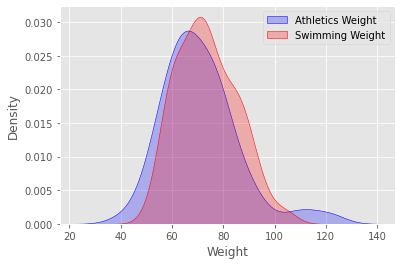

Fail to reject the NULL. Athletics and Swimming DO have same mean weight.


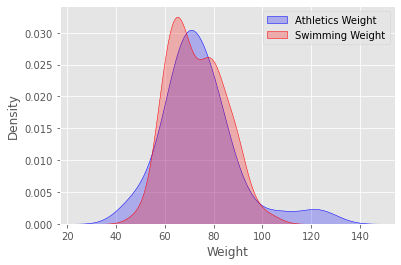

Fail to reject the NULL. Athletics and Swimming DO have same mean weight.


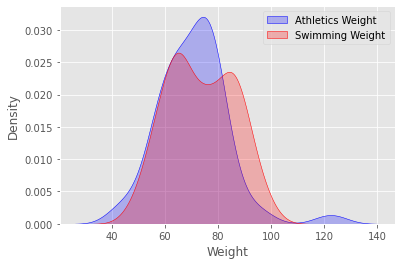

Fail to reject the NULL. Athletics and Swimming DO have same mean weight.


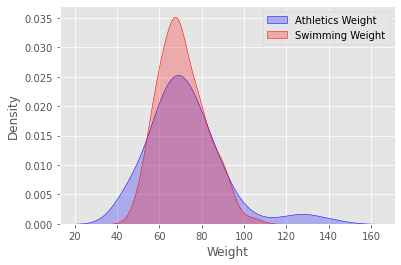

Fail to reject the NULL. Athletics and Swimming DO have same mean weight.


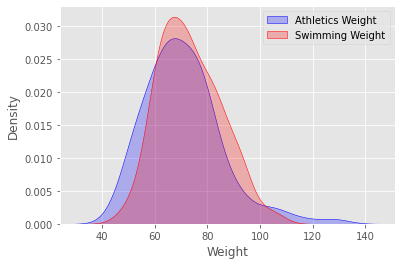

Fail to reject the NULL. Athletics and Swimming DO have same mean weight.


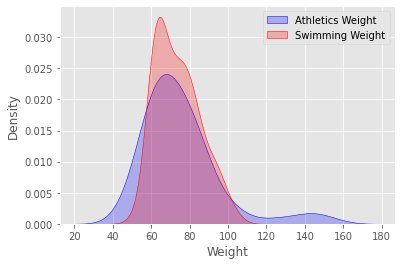

Fail to reject the NULL. Athletics and Swimming DO have same mean weight.


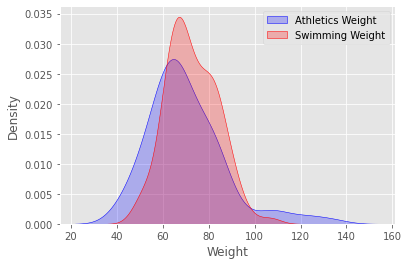

Fail to reject the NULL. Athletics and Swimming DO have same mean weight.


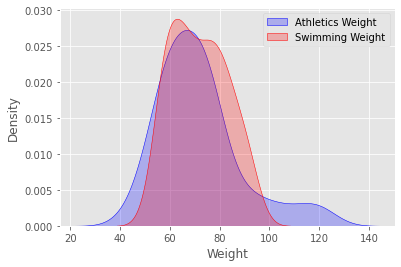

Fail to reject the NULL. Athletics and Swimming DO have same mean weight.


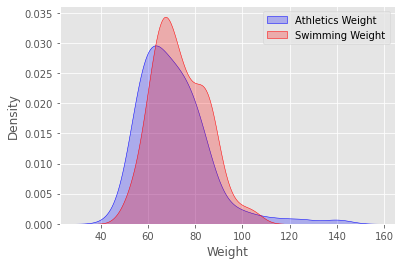

Fail to reject the NULL. Athletics and Swimming DO have same mean weight.


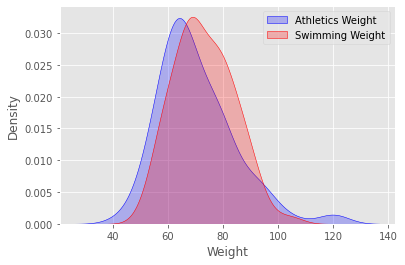

Fail to reject the NULL. Athletics and Swimming DO have same mean weight.


In [21]:
#E. RANDOM SAMPLING ON ATHLETS TO PERFORM TWO-SIDED T-TEST ON THEIR WEIGHT
import random
randomlist = random.sample(range(10, 300000), 10)


for item in randomlist:
    sub_a=A[A.Sport=='Athletics'].dropna().sample(n=100,random_state=item)
    sub_s=A[A.Sport=='Swimming'].dropna().sample(n=100,random_state=item)

    sns.kdeplot(sub_a.Weight,color='b',shade=True)
    sns.kdeplot(sub_s.Weight,color='r',shade=True)
    plt.legend(('Athletics Weight', 'Swimming Weight'))
    plt.show()

    t_result = stats.ttest_ind(sub_a.Weight, sub_s.Weight) 
    alpha=0.05
    if t_result[1]<=alpha:
        print("Reject the NULL. Athletics and Swimming DO NOT have same mean weight.")
    else:
        print("Fail to reject the NULL. Athletics and Swimming DO have same mean weight.")


#The results are dependent on seed set. By changing the seed, the results are changing. How can be improve?

Fail to reject the NULL. Athletics and Swimming DO have same mean weight.
Fail to reject the NULL. Athletics and Swimming DO have same mean weight.
Fail to reject the NULL. Athletics and Swimming DO have same mean weight.
Fail to reject the NULL. Athletics and Swimming DO have same mean weight.
Fail to reject the NULL. Athletics and Swimming DO have same mean weight.
Fail to reject the NULL. Athletics and Swimming DO have same mean weight.
Fail to reject the NULL. Athletics and Swimming DO have same mean weight.
Fail to reject the NULL. Athletics and Swimming DO have same mean weight.
Fail to reject the NULL. Athletics and Swimming DO have same mean weight.
Fail to reject the NULL. Athletics and Swimming DO have same mean weight.


<AxesSubplot:xlabel='Sport', ylabel='Weight'>

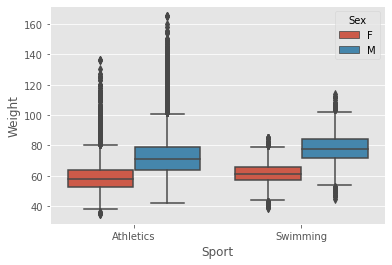

In [22]:
#F CONFOUNDING FACTORS - CONTROLLING FOR COVARIATES 
#From above, some coviarates my affect the results, since changing the seed, change results. In this case we want to control for GENDER. Gender may drive the above results: in some sample
#when more male are present than female, the mean for a given group (Athletics/swimming) maybe altered by COVARIATES IMBALANCES.

for item in randomlist:
    #Subsetting same number of observations across sports times sex
    Sub_A_F=A[(A.Sport=='Athletics') &(A .Sex=='F')].dropna().sample(n=100,random_state=item)
    Sub_A_M=A[(A.Sport=='Athletics')&(A.Sex=='M')].dropna().sample(n=100,random_state=item)
    Sub_S_F=A[(A.Sport=='Swimming')&(A.Sex=='F')].dropna().sample(n=100,random_state=item)
    Sub_S_M=A[(A.Sport=='Swimming')&(A.Sex=='M')].dropna().sample(n=100,random_state=item)


    #Re-combo dataset across gender
    Sub_A_combo = pd.concat([Sub_A_F, Sub_A_M])
    Sub_S_combo = pd.concat([Sub_S_F, Sub_S_M])
    Sub_Combo=pd.concat([Sub_A_combo,Sub_S_combo])

    t_resul=stats.ttest_ind(Sub_A_combo.Weight,Sub_S_combo.Weight)
    alpha=0.05
    if t_result[1]<=alpha:
        print("Reject the NULL. Athletics and Swimming DO NOT have same mean weight.")
    else:
        print("Fail to reject the NULL. Athletics and Swimming DO have same mean weight.")

sns.boxplot(x="Sport", y="Weight", hue="Sex",
                 data=A)

In [23]:
Sub_Combo.groupby(by=['Sport','Sex'])['Weight'].mean()

Sport      Sex
Athletics  F      62.160
           M      75.065
Swimming   F      63.660
           M      82.180
Name: Weight, dtype: float64

In [24]:
Sub_Combo.groupby(by=['Sport','Sex'])['Weight'].count()

Sport      Sex
Athletics  F      100
           M      100
Swimming   F      100
           M      100
Name: Weight, dtype: int64

In [25]:
Sub_Combo.groupby(by=['Sport'])['Weight'].mean()

Sport
Athletics    68.6125
Swimming     72.9200
Name: Weight, dtype: float64

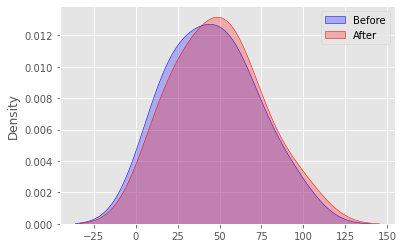

Method: T-Student for independence samples. Fail to reject the null. Fertilizer is NOT effective in increasing yields.
Method: Paired test. Reject the null. Fertilizer is effective in increasing yields.


In [26]:
#G - PAIRED-TEST: this test is a way of comparing pre and after treatment observational units. Each subject is measured twice: pre and after treatment. We compare the mean across
#pre and post treatments to ascertain if the mean is zero.

y2018 = [60.2, 12, 13.8, 91.8, 50, 27, 71.1, 41, 31, 55.9]      #Yield 2018 = potato yield before new fertilizer
y2019 = [63.2, 15.6, 14.8, 96.7, 53, 29.9, 73, 44.4, 38, 57.3]  #Yield 2019 = potato yield after new fertilizer (treatment)

len(y2018)-len(y2019)                                           #Same 10 units observed over time.

sns.kdeplot(y2018,shade=True,color='b')
sns.kdeplot(y2019,shade=True,color='r')
plt.legend(("Before","After"))
plt.show()

y=pd.DataFrame({"Yield2018":y2018, "Yield2019":y2019})

#We conduct a two-sided t-Student independent test - LESS SENSITIVE
t_res=stats.ttest_ind(y.Yield2018,y.Yield2019)
ttestpair = stats.ttest_rel(y.Yield2018,y.Yield2019)
alpha=0.05
if t_res[1]<alpha:
    print("Method: T-Student for independence samples. Reject the null. Fertilizer is effective in increasing yields.")
else:
    print("Method: T-Student for independence samples. Fail to reject the null. Fertilizer is NOT effective in increasing yields.")

if ttestpair[1]<alpha:
    print("Method: Paired test. Reject the null. Fertilizer is effective in increasing yields.")
else:
    print("Method: Paired test. Fail to reject the null. Fertilizer is NOT effective in increasing yields.")

In [27]:
#Since individual field effects (variation within the samples each year is larger in comparison of the different years than paired test picks up effects that t-Student cannot)

Delta=y.Yield2019-y.Yield2018
Delta.mean() -(y.Yield2019.mean()-y.Yield2018.mean())

Delta_std_error=Delta.std()/np.sqrt(10)                                          #Treatment effect (the variation over different of yields between two years)

Individual_deltas_std_error=np.sqrt(y.Yield2019.var()/10+y.Yield2018.var()/10)   #Individual field effect (the variation across fields in a given year)

print("Independent Test")
print(Delta.mean()/Individual_deltas_std_error)
print(Individual_deltas_std_error)
print(t_res)

print("Paird test")
print(Delta.mean()/Delta_std_error)
print(Delta_std_error)
print(ttestpair)

Independent Test
0.28067804748671304
11.436590886759529
Ttest_indResult(statistic=-0.28067804748671366, pvalue=0.7821579668814133)
Paird test
5.8103843639412585
0.5524591488165538
Ttest_relResult(statistic=-5.810384363941258, pvalue=0.00025612231200667805)


Reject H_0


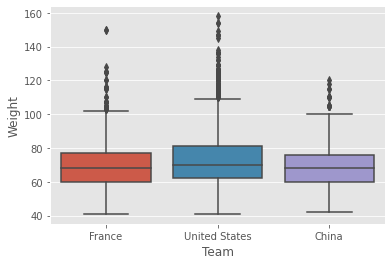

In [28]:
#H - ANOVA by Fisher [Distrivuted as F ratio]
# Analyze the delta among means + generalization of t-test beyond the two means
# Based on the law of TOTAL VARIANCE
# The variance of a target variable is PARTITIONED into components attributable to different sources of variation

#H.1 One-way ANOVA -> Variation of Weight of Olympic gamers across NATIONS -> Ho: mu_1=mu_2=mu_3=...=mu_k [we perform k partitions]

sns.boxplot(x="Team", y="Weight",
                 data=A[A['Team'].isin(['United States','China','France'])])


W_US=A[A['Team']=='United States'].dropna().Weight
W_Ch=A[A['Team']=='China'].dropna().Weight
W_Fr=A[A['Team']=='France'].dropna().Weight

anova = stats.f_oneway(W_Fr, W_US, W_Ch)

if anova[1]<0.05:
    print("Reject H_0")
else:
    print("Fail to reject H_0")

In [29]:
mean_US=W_US.mean()
mean_C=W_Ch.mean()
mean_F=W_Fr.mean()

count_US=W_US.count()
count_C=W_Ch.count()
count_F=W_Fr.count()

SSE_US=np.sum((W_US-mean_US)**2)
SSE_C=np.sum((W_Ch-mean_C)**2)
SSE_F=np.sum((W_Fr-mean_F)**2)

mean_overall=pd.concat([W_US,W_Ch,W_Fr]).mean()
Total_observations=pd.concat([W_US,W_Ch,W_Fr]).count()
K=3 #Number of independent group in the sample

N=(count_US*(mean_US-mean_overall)**2+count_C*(mean_C-mean_overall)**2+count_F*(mean_F-mean_overall)**2)/(K-1)
D=(SSE_US+SSE_C+SSE_F)/(Total_observations-K)

F=N/D #This is the statistics for the one-way ANOVA.

df_1=K-1
df_2=N-K

Critical_F=stats.f.ppf(q=1-0.05, dfn=df_1, dfd=df_2)

if F>=Critical_F:
    print("Reject H_0 that all means are identical.")
else:
    print("Fail to reject H_0 that all means are identical.")

Reject H_0 that all means are identical.


C:\Python\Python397\lib\site-packages\statsmodels\base\model.py:1871: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 238, but rank is 229
  warnings.warn('covariance of constraints does not have full '


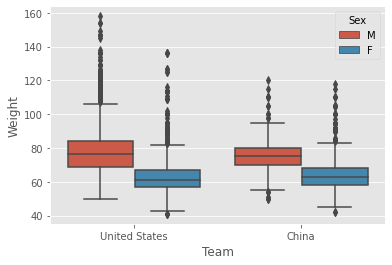

In [30]:
#H.2 Two-way ANOVA -> Variation of Weight of Olympic gamers across NATIONS by GENDER -> Ho: mu_1=mu_2=mu_3=...=mu_k [we perform k partitions]

sns.boxplot(x="Team", y="Weight",hue='Sex',
                 data=A[A['Team'].isin(['United States','China'])])


import statsmodels.api as sm

# Create model
model = sm.formula.ols('Weight ~ Sex + Team', data=A).fit()
aov_table = sm.stats.anova_lm(model, typ=2)

#F is the marginal effect of adding a variable to the model

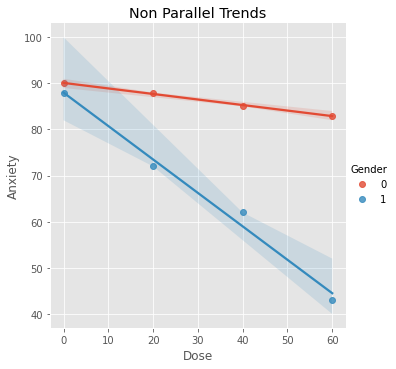

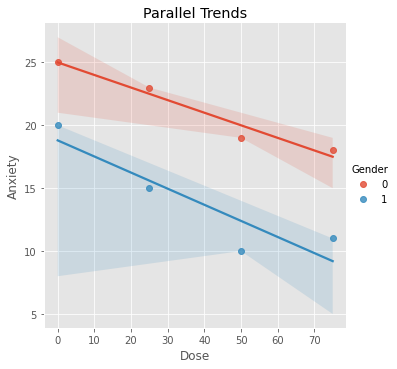

In [31]:
#Two-way ANOVA with interaction effects: THE PARALLEL TREND HYPOTHESIS

Anxiety_NP=list([90,88,85,83,88,72,62,43])
Dose_NP=list([0,20,40,60,0,20,40,60])
Gender_NP=list([0,0,0,0,1,1,1,1])
df_NP=pd.DataFrame({'Anxiety':Anxiety_NP,'Dose':Dose_NP,'Gender':Gender_NP})


Anxiety_P=list([20,15,10,11,25,23,19,18])
Dose_P=list([0,25,50,75,0,25,50,75])
Gender_P=list([1,1,1,1,0,0,0,0])
df_P=pd.DataFrame({'Anxiety':Anxiety_P,'Dose':Dose_P,'Gender':Gender_P})



sns.lmplot(x="Dose", y="Anxiety", hue="Gender", data=df_NP)
plt.title("Non Parallel Trends")
plt.show()


sns.lmplot(x="Dose", y="Anxiety", hue="Gender", data=df_P)
plt.title("Parallel Trends")
plt.show()

In [32]:
#No iteracton
model = sm.formula.ols('Anxiety ~ Dose + Gender ', data=df_NP).fit()
aov_table = sm.stats.anova_lm(model, typ=2)


#Parallel Trends Interactive Effects OLS > Interaction term is NOT SIGNIFICANT
model_P = sm.formula.ols('Anxiety ~ Dose + Gender + Dose:Gender', data=df_P).fit()
aov_table_P = sm.stats.anova_lm(model_P, typ=2)

#Non Parallel Trends Interactive Effects OLS > Interaction term is SIGNIFICANT
model_NP = sm.formula.ols('Anxiety ~ Dose + Gender + Dose:Gender', data=df_NP).fit()
aov_table_NP = sm.stats.anova_lm(model_NP, typ=2)

print(aov_table_P)
print(aov_table_NP)

#A significant interaction term means lower importance of the main regressors.

              sum_sq   df          F    PR(>F)
Dose          81.225  1.0  26.414634  0.006794
Gender       105.125  1.0  34.186992  0.004267
Dose:Gender    1.225  1.0   0.398374  0.562199
Residual      12.300  4.0        NaN       NaN
              sum_sq   df           F    PR(>F)
Dose         714.025  1.0  208.474453  0.000134
Gender       820.125  1.0  239.452555  0.000102
Dose:Gender  366.025  1.0  106.868613  0.000494
Residual      13.700  4.0         NaN       NaN


In [33]:
print("Model with no interactions")
print(model.summary())
print("Two regressors are significant at 5%")

Model with no interactions
                            OLS Regression Results                            
Dep. Variable:                Anxiety   R-squared:                       0.802
Model:                            OLS   Adj. R-squared:                  0.722
Method:                 Least Squares   F-statistic:                     10.10
Date:                Thu, 06 Jan 2022   Prob (F-statistic):             0.0175
Time:                        13:20:57   Log-Likelihood:                -26.792
No. Observations:                   8   AIC:                             59.58
Df Residuals:                       5   BIC:                             59.82
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     99.1750    

C:\Python\Python397\lib\site-packages\scipy\stats\stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [34]:
print("Model with Non Parallel Trend: the interaction is statistically significant.")
print(model_NP.summary())

Model with Non Parallel Trend: the interaction is statistically significant.
                            OLS Regression Results                            
Dep. Variable:                Anxiety   R-squared:                       0.993
Model:                            OLS   Adj. R-squared:                  0.987
Method:                 Least Squares   F-statistic:                     184.9
Date:                Thu, 06 Jan 2022   Prob (F-statistic):           9.58e-05
Time:                        13:20:57   Log-Likelihood:                -13.503
No. Observations:                   8   AIC:                             35.01
Df Residuals:                       4   BIC:                             35.32
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------

C:\Python\Python397\lib\site-packages\scipy\stats\stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [35]:
print("Model with  Parallel Trend: the interaction is NOT statistically significant.")
print(model_P.summary())

Model with  Parallel Trend: the interaction is NOT statistically significant.
                            OLS Regression Results                            
Dep. Variable:                Anxiety   R-squared:                       0.938
Model:                            OLS   Adj. R-squared:                  0.892
Method:                 Least Squares   F-statistic:                     20.33
Date:                Thu, 06 Jan 2022   Prob (F-statistic):            0.00695
Time:                        13:20:57   Log-Likelihood:                -13.072
No. Observations:                   8   AIC:                             34.14
Df Residuals:                       4   BIC:                             34.46
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------

C:\Python\Python397\lib\site-packages\scipy\stats\stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


                df        sum_sq       mean_sq             F   PR(>F)
Sex            1.0  2.514657e+06  2.514657e+06  44007.723622  0.00000
Event        137.0  4.719930e+06  3.445204e+04    602.927618  0.00000
Sex:Event    137.0  1.138516e+04  8.310333e+01      1.454349  0.00042
Residual   51278.0  2.930090e+06  5.714126e+01           NaN      NaN


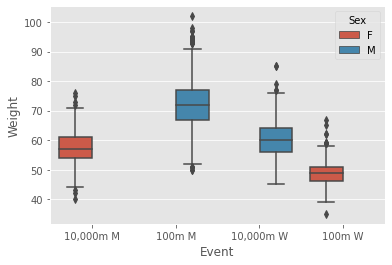

In [36]:
#Two-way ANOVA: 
df = A[A['Event'].isin(["Athletics Men's 10,000 metres",
                                      "Athletics Men's 100 metres",
                                      "Athletics Women's 10,000 metres",
                                      "Athletics Women's 100 metres"])]

ax = sns.boxplot(data=df, x="Event", y="Weight", hue="Sex")
ax.set_xticklabels(['10,000m M','100m M','10,000m W','100m W'])

model=sm.formula.ols('Weight ~ Sex + Event + Sex:Event',data=A).fit()
aov_table = sm.stats.anova_lm(model)

print(aov_table)

In [37]:
#Three-way ANOVA
model=sm.formula.ols('Weight ~ Sex + Event + Age + Sex:Age + Sex:Event + Age:Event + Sex:Event:Age',data=A).fit()
aov_table=sm.stats.anova_lm(model)
print(aov_table)

                    df        sum_sq       mean_sq             F  \
Sex                1.0  2.523048e+06  2.523048e+06  45971.650833   
Event            137.0  4.705287e+06  3.434516e+04    625.792020   
Sex:Event        137.0  9.824030e+03  7.170824e+01      1.306573   
Age                1.0  6.797819e+04  6.797819e+04   1238.608604   
Sex:Age            1.0  1.681431e+03  1.681431e+03     30.636810   
Age:Event        137.0  4.600687e+04  3.358166e+02      6.118805   
Sex:Event:Age    137.0  9.971220e+03  7.278263e+01      1.326149   
Residual       50942.0  2.795835e+06  5.488270e+01           NaN   

                      PR(>F)  
Sex             0.000000e+00  
Event           0.000000e+00  
Sex:Event       9.340684e-03  
Age            4.145802e-268  
Sex:Age         3.126632e-08  
Age:Event      4.175559e-100  
Sex:Event:Age   6.446903e-03  
Residual                 NaN  


In [160]:
#SIDAK & BONFERRONI ARE WAYS TO CORRECT FOR ALPHA INFLATION WHEN WE RUN MULTIPLE STATISTICAL TESTS ON A SET OF DATA
#I. BONFERRONI CORRECTION
# alpha = TYPE I ERROR = Pr(Rejecting H_0 given H_0 true)
# It is an adjustment that is supposed to be applied on p-values when two or more statistical analyses [INPENDENT OR DEPENDENT] have been performed on the SAME SAMPLE of data.
# Problem to deal with: the Family Wise Error Rate (FWER) is larger than the per analysis error rate (alpha = 0.05)

# a_FW = 1- (1-a)^c, c = number of comparisons [Assuming experiments are INPENDENT]

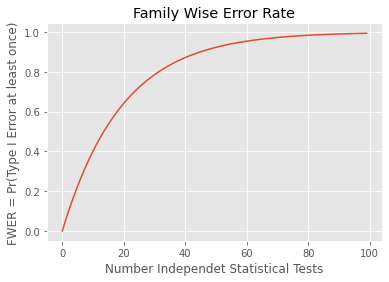

In [143]:
a = 0.05
c =np.arange(0,100)

a_FW=1-(1-a)**c


plt.plot(c,a_FW)
plt.title("Family Wise Error Rate")
plt.xlabel("Number Independet Statistical Tests")
plt.ylabel("FWER = Pr(Type I Error at least once)")
plt.show()

#Bonferroni tries to correct and contrast th effect of FWER to blow.
#Approach 1 [Most Common] = alpha/c [per analysis alpha rate] -> Any p_value < alpha/c implies H_0 rejection -> This way the Family Wise Error is upper bounded to alpha -> effect: rejecting more often
#Appoach 2 [Less Common] = p_values(c) [observed p value for test c] * c -> p_values(c)*c < alpha implies H_0 rejection

Non corrected
          0
0  0.000082
1  0.023592
2  0.061825
Bonferroni Corrected via package
          0
0  0.000247
1  0.070777
2  0.185476
Bonferroni Corrected 'manually'
          0
0  0.000247
1  0.070777
2  0.185476
Sidak Corrected via package
          0
0  0.000247
1  0.069121
2  0.174245
Sidak Corrected Corrected 'manually'
          0
0  0.000247
1  0.069121
2  0.174245


C:\Users\AndreaLunghini\AppData\Local\Temp/ipykernel_23840/3968765961.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only
  df=A[A['Year']==1924].dropna(0).append(A[A['Year']==1952].dropna(0)).append(A[A['Year']==2016].dropna(0))


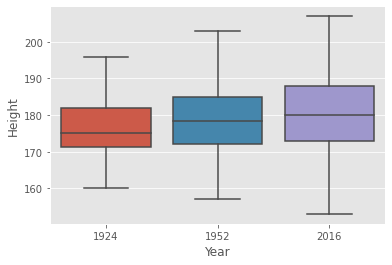

In [164]:
# Sample out from dataframe three years
df=A[A['Year']==1924].dropna(0).append(A[A['Year']==1952].dropna(0)).append(A[A['Year']==2016].dropna(0))
sns.boxplot(data=df, x="Year", y="Height")

# Test independence for means

t_result_1924v2016=stats.ttest_ind(df[df.Year == 1924].Height,
                                   df[df.Year == 2016].Height)

t_result_1924v1952=stats.ttest_ind(df[df.Year == 1924].Height,
                                   df[df.Year == 1952].Height)

t_result_1952v2016=stats.ttest_ind(df[df.Year == 1952].Height,
                                   df[df.Year == 2016].Height)


p_value_1924vs2016=t_result_1924v2016[1]
p_value_1924v1952=t_result_1924v1952[1]
p_value_1952v2016=t_result_1952v2016[1]

pvals_array=[p_value_1924vs2016,p_value_1924v1952,p_value_1952v2016]

print("Non corrected")
print(pd.DataFrame(pvals_array))

Bonferroni_cor_package=sm.stats.multipletests(pvals_array,alpha=0.05,method='b')

print("Bonferroni Corrected via package")
print(pd.DataFrame(Bonferroni_cor_package[1]))

print("Bonferroni Corrected 'manually'")
print(pd.DataFrame(pvals_array)*3)

#L. SIDAK CORRECTION
#. 1. Tests are independent
#. p_value < 1-(1-alpha)^(1/c) [recalling the Family Wise Error Probability but this is non linearly - powerly - decreasing in c, the number of experiments]
#. Solve per alpha above to get the corrected Sidak pvalues: p_value < 1-(1-alpha)^(1/c) implies 1-(1-p)^c < alpha

Sidak=sm.stats.multipletests(pvals_array,alpha=0.05,method='s')
print("Sidak Corrected via package")
print(pd.DataFrame(Sidak[1]))

print("Sidak Corrected Corrected 'manually'")
print(pd.DataFrame(1-(1-pd.DataFrame(pvals_array))**3))

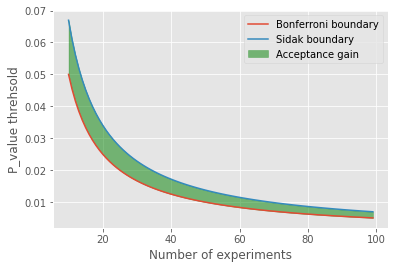

In [192]:
#How does Bonferroni and Sidak compare? The correction inflating the p_values the most is the most "conversative"/"pessimistic" since increases chances to hit the 5% alpha level.
c =np.arange(10,100)
alpha=0.5

p_th_bonferroni=alpha/c
p_th_sidak=1-(1-alpha)**(1/c)

plt.plot(c,p_th_bonferroni)
plt.plot(c,p_th_sidak)
plt.ylabel("P_value threhsold")
plt.xlabel("Number of experiments")
plt.fill_between(c,p_th_bonferroni, p_th_sidak,color='green',
                 alpha=0.5)
plt.legend(("Bonferroni boundary","Sidak boundary","Acceptance gain"))
plt.show()

In [203]:
# M. SIZE AND POWER
# Power =Pr(Reject H_0 given H_1 true) = 1-Beta           --- POWER
# Beta = Pr(Accept H_0 given H_1 true) =  Type II Error   --- FALSE NEGATIVE
# Alpha = Pr(Reject H_0 given H_0 true) = Type I Error    --- FALSE POSITIVE

# Low power = Higher chances of false negatives
# Power analyis = estimation of minimum sample size given alpha, effect size and statistical power

# Effect size = estimated in population, as Pearson's correlation coefficient
# Sample size = number of observations in the sample
# Significance = alpha

# Effect size measures
# Coehn's d, Odds ratio, correlation coefficients

# Experiment: alpha: 5%, effect size = 0.8, statistical power = 0.8: what is the right sample size?
#TTestIndPower.solve_power(effect_size=None, nobs1=None, alpha=None, power=None, ratio=1.0, alternative='two-sided') -> set to None the desired
#variable


# If H_0 is really true, then R/A H_0 leads to (1-alpha) and alpha > Based on SAMPLE
# If H_0 is truly false, then R/A H_= leads to (1-beta) and beta   > Based on DIFFERENCE IN THE POPULATION
import statsmodels.stats.power as smp
power_analysis = smp.TTestIndPower()

power_analysis.solve_power(effect_size=0.8, nobs1=None, alpha=0.05, power=0.8, ratio=1.0, alternative='two-sided')

25.524572500479415

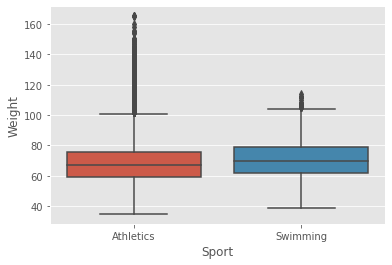

In [235]:
#Exploring sample size for a t test
sns.boxplot(x="Sport", y="Weight", data=A)

effect=0.4
power=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
alpha=0.05

S_1_count=float(A[A['Sport']=='Athletics'].dropna().shape[0])
S_2_count=float(A[A['Sport']=='Swimming'].dropna().shape[0])
ratio=S_1_count/S_2_count

Sample_size=[]
for item1 in power:
    SS=power_analysis.solve_power(effect_size=effect, nobs1=None, alpha=alpha, power=item1, ratio=1/ratio, alternative='two-sided')
    Sample_size.append(SS)

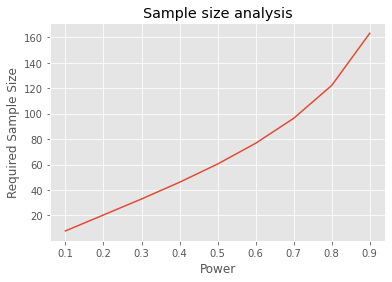

In [238]:
ax1=plt.plot(power,Sample_size)
plt.xlabel("Power")
plt.title("Sample size analysis")
plt.ylabel("Required Sample Size")
plt.show()

In [270]:
#Effect size for t-test (1)
alpha = 0.05
power = 0.8
ratio = float(len(A[A.Sport == "Swimming"])) / len(A[A.Sport == "Athletics"])
samp_size = max(len(A[A.Sport == "Athletics"]),len(A[A.Sport == "Swimming"]))

# Initialize analysis & calculate effect size
analysis = smp.TTestIndPower()
esresult = analysis.solve_power(effect_size = None, 
                                power = power, 
                                nobs1 = samp_size, 
                                ratio = ratio, 
                                alpha = alpha)

print("Minimum detectable effect size : " + str(round(esresult,5)))
print("This implies that the minimum difference in means between the Null and the Alternative that is in the data must be of magnitude: " +str(round(esresult,5)) + str(" to bed detected."))

Minimum detectable effect size : 0.02327
This implies that the minimum difference in means between the Null and the Alternative that is in the data must be of magnitude: 0.02327 to bed detected.


In [271]:
#Effect size for t-test (2)
alpha = 0.05
power = 0.8
ratio = float(len(A[A.Sport == "Swimming"])) / len(A[A.Sport == "Athletics"])
samp_size = 300

# Initialize analysis & calculate effect size
analysis = smp.TTestIndPower()
esresult = analysis.solve_power(effect_size = None, 
                                power = power, 
                                nobs1 = samp_size, 
                                ratio = ratio, 
                                alpha = alpha)

print("Minimum detectable effect size : " + str(round(esresult,5)))
print("This implies that the minimum difference in means between the Null and the Alternative that is in the data must be of magnitude: " +str(round(esresult,5)) + str(" to bed detected."))

Minimum detectable effect size : 0.26459
This implies that the minimum difference in means between the Null and the Alternative that is in the data must be of magnitude: 0.26459 to bed detected.


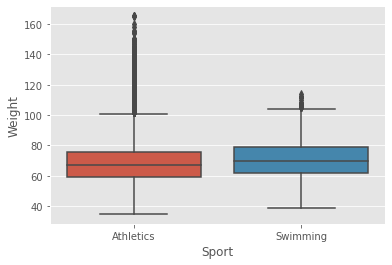

In [289]:
#Coehn's d: standardized measure different between two means -> this is the suitable measure of effect size when the objective is to perform a t-test for difference in
#means.

# Create series
athl = A[A.Sport == "Athletics"].Weight
swim = A[A.Sport == "Swimming"].Weight

sns.boxplot(x="Sport", y="Weight", data=A)

#Calculate the means different and the pooled std.dev
#Cohen (1988) describes the simple standard deviation as sqrt((SD_1^2+SD_2^2)/2)
#Or it is possible to adjust at numerator for sample sizes (n_j-1) and to divide by (n_k+n_j-2)

delta_mu=athl.mean()-swim.mean()

pool_std_w=np.sqrt(((athl.count()-1)*athl.std()**2+(swim.count()-1)*swim.std()**2)/(athl.count()+swim.count()-2))
pool_std_s=np.sqrt((athl.std()**2+swim.std()**2)/2)

Cohen_d_s=delta_mu/pool_std_s
Cohen_d_w=delta_mu/pool_std_w

In [ ]:
#Cohen'd is important because it tells us the difference in means that it is present in the data, hence we know that the calibrate parameters in (1) will be able, given the suggested sample size to
#detect this effect size, but not the sample size in (2).

In [317]:
#Odds ratio works to detect the effect size in population, for instance with a Fisher exact test. This works as a Chi-squared test but on smaller sample.
#Odds ratio is the main diagonal divided by the antidiagonal (the matrix helps detecting correlation across the categorical variables)
table = pd.crosstab(A.MedalTF,A.Sport)
display(table)


chi = stats.fisher_exact(table, alternative='two-sided')

Odds_ratio_manual=(np.array(table)[0][0]*np.array(table)[1][1])/(np.array(table)[0][1]*np.array(table)[1][0])
print("The manual ODDS ratio is " + str(Odds_ratio_manual)+ str("."))

print("The ODDS ratio in the Fisher exact text [ON THE A PRIORI DISTRIBUTION] is " + str(chi[0]) + str("."))

Sport,Athletics,Swimming
MedalTF,,
False,34655,20147
True,3969,3048


The manual ODDS ratio is 1.3209591287858877.
The ODDS ratio in the Fisher exact text [ON THE A PRIORI DISTRIBUTION] is 1.3209591287858877.


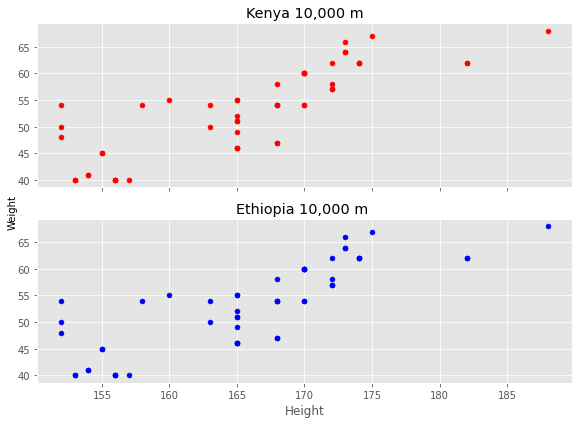

Kenya: (0.8240313258298184, 6.196777415717599e-14)
Ethiopia: (0.7073072629926875, 4.579067659050299e-09)


In [361]:
#Effect size for Pearson's correlation -> measure of strenght. We want to compare for a single event (10,000 meters) the correlation between height and weight for two countries: Kenya and Ethiopa
Kenya=A[(A['Team']=='Kenya')&(A['Event'].isin(["Athletics Men's 10,000 metres","Athletics Women's 10,000 metres"]))].copy()
Eth=A[(A['Team']=='Ethiopia')&(A['Event'].isin(["Athletics Men's 10,000 metres","Athletics Women's 10,000 metres"]))].copy()

fig, ax = plt.subplots(2,1,sharex=True,sharey=True,figsize=(8,6))
ax[0].scatter(Kenya.Height,Kenya.Weight,color='red',s=25)
ax[1].scatter(Kenya.Height,Kenya.Weight,color='blue',s=25)

ax[0].set_title("Kenya 10,000 m")
ax[1].set_title("Ethiopia 10,000 m ")
ax[1].set_xlabel("Height")
fig.text(0.001, 0.5, 'Weight', va='center', rotation='vertical')
plt.tight_layout()
plt.show()

print("Kenya: " +str(stats.pearsonr(Kenya.Height.dropna(),Kenya.Weight.dropna())))
print("Ethiopia: " +str(stats.pearsonr(Eth.Height.dropna(),Eth.Weight.dropna())))

No handles with labels found to put in legend.


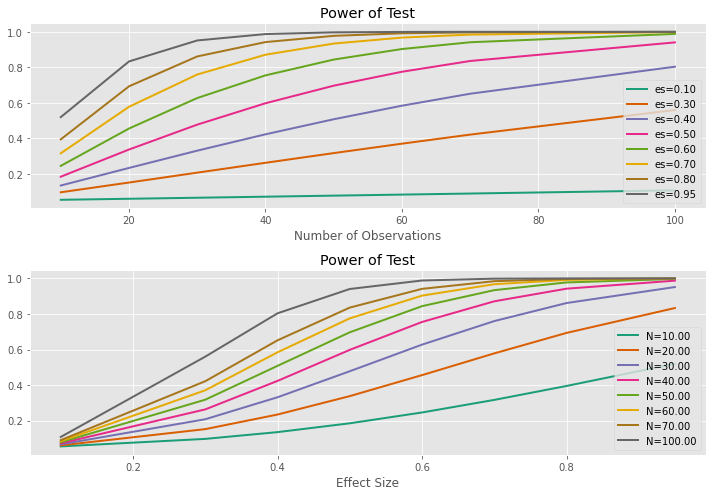

In [377]:
#Power curves for a T-test
#Power = Probability of rejecting H_0 when H_1 is true = (1-Beta)=(1-Pr[Type II Error])

# y = Power = f([effect size, sample size, alpha])

#Parameter simulation
effect_sizes = np.array([0.1, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.95])
sample_sizes = np.array([10, 20, 30, 40, 50, 60, 70, 100])

# calculate power curves from multiple power analyses
analysis = smp.TTestIndPower()

fig2, ax2 = plt.subplots(2,1, figsize=(10,7))
analysis.plot_power(dep_var='nobs', nobs=sample_sizes, effect_size=effect_sizes, alpha=0.05, ax=ax2[0])  #Deceiving: the dependent variable is the x-axis!
analysis.plot_power(dep_var='es', nobs=sample_sizes, effect_size=effect_sizes, alpha=0.05, ax=ax2[1])
ax[1].set_title('')

ax[0].legend(bbox_to_anchor=(1, 1.05))
ax[1].legend(bbox_to_anchor=(1, 1.05))

ax[0].margins(0.015)
ax[1].margins(0.015)

fig.text(0.001, 0.5, 'Power', va='center', rotation='vertical')
plt.tight_layout()
plt.show()

In [379]:
#M. NORMALITY TESTS

#M.1 SHAPIRO-WILK TEST
pd.set_option('display.max_columns', None)
countrydata = pd.read_csv('https://assets.datacamp.com/production/repositories/4371/datasets/f5c1016b818f97ec200236fb161ae711944fb2cb/undata_country_profile_variables.csv')
countrydata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 229 entries, 0 to 228
Data columns (total 50 columns):
 #   Column                                                      Non-Null Count  Dtype  
---  ------                                                      --------------  -----  
 0   country                                                     229 non-null    object 
 1   Region                                                      229 non-null    object 
 2   Surface area (km2)                                          226 non-null    object 
 3   Population in thousands (2017)                              229 non-null    int64  
 4   Population density (per km2, 2017)                          229 non-null    float64
 5   Sex ratio (m per 100 f, 2017)                               227 non-null    float64
 6   GDP: Gross domestic product (million current US$)           208 non-null    float64
 7   GDP growth rate (annual %, const. 2005 prices)              208 non-null    object 
 8   

In [381]:
countrydata.head(1).T

,0
country,Afghanistan
Region,SouthernAsia
Surface area (km2),652864
Population in thousands (2017),35530
"Population density (per km2, 2017)",54.4
"Sex ratio (m per 100 f, 2017)",106.3
GDP: Gross domestic product (million current US$),20270.0
"GDP growth rate (annual %, const. 2005 prices)",-2.4
GDP per capita (current US$),623.2
Economy: Agriculture (% of GVA),23.3


In [384]:
countrydata['Unemployment (% of labour force)'].replace('...', np.nan, inplace=True)
countrydata['Unemployment (% of labour force)'] = countrydata['Unemployment (% of labour force)'].astype(float)

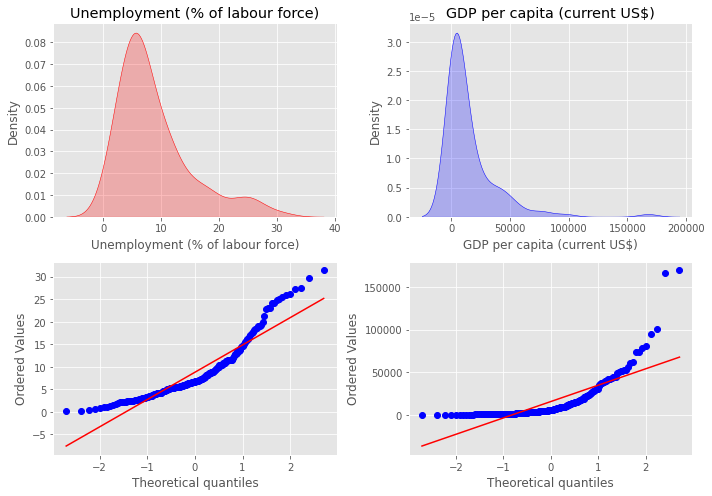

Unemployment, Method: Shapiro Wilk test: ShapiroResult(statistic=0.868168830871582, pvalue=3.0448254594722668e-12)
GDP, Method: Shapiro-Wilk test: ShapiroResult(statistic=0.6302613615989685, pvalue=5.600625458404526e-21)


In [407]:
from scipy.stats import probplot
import warnings
warnings.filterwarnings('ignore')


fig, ax = plt.subplots(2,2, figsize=(10,7))
sns.kdeplot(countrydata['Unemployment (% of labour force)'].dropna(), ax=ax[0][0], color='red', shade=True, legend=False)
sns.kdeplot(countrydata['GDP per capita (current US$)'].dropna(), ax=ax[0][1], color='blue', shade=True, legend=False)

probplot(countrydata['Unemployment (% of labour force)'].dropna(),plot=ax[1][0],dist='norm')
probplot(countrydata['GDP per capita (current US$)'].dropna(),plot=ax[1][1],dist='norm')

ax[0][0].set_title('Unemployment (% of labour force)')
ax[0][1].set_title('GDP per capita (current US$)')

ax[1][0].set_title('')
ax[1][1].set_title('')

plt.tight_layout()
plt.show()

print(str("Unemployment, Method: Shapiro Wilk test: ")+ str(stats.shapiro(countrydata['Unemployment (% of labour force)'].dropna())))
print(str("GDP, Method: Shapiro-Wilk test: ") + str(stats.shapiro(countrydata['GDP per capita (current US$)'].dropna())))

# p_value < alpha -> H_o Reject, H_0: Normality

In [424]:
#M.2 D’Agostino’s K^2 Test [H_0 normality, test is based on transformations of kurtosis and skewness]. This test combines kurtosis and skewness transformations to delivery an OMNIBUS TEST.
print(str("Unemployment, Method: D'Agostino-Pearson test: ")+ str(stats.normaltest(countrydata['Unemployment (% of labour force)'].dropna())))
print(str("GDP, Method: D'Agostino-Pearson test: ") + str(stats.normaltest(countrydata['GDP per capita (current US$)'].dropna())))
#p_value < alpha >> Not Normal

#M.3 Anderson-Darling Test -> general test to compare if a given empirical distribution, matching a given theoretical one.
#H_0: Data follows the theoretical distribution, dist{‘norm’, ‘expon’, ‘logistic’, ‘gumbel’, ‘gumbel_l’, ‘gumbel_r’, ‘extreme1’}
r=stats.anderson(countrydata['Unemployment (% of labour force)'].dropna(), dist='norm')

if sum(r.critical_values<r.statistic)==5:
    print("Non Gaussian")
else:
    print("Gaussian")


r=stats.anderson(countrydata['GDP per capita (current US$)'].dropna(), dist='norm')

if sum(r.critical_values<r.statistic)==5:
    print("Non Gaussian")
else:
    print("Gaussian")

Unemployment, Method: D'Agostino-Pearson test: NormaltestResult(statistic=50.7347977078487, pvalue=9.617864571325931e-12)
GDP, Method: D'Agostino-Pearson test: NormaltestResult(statistic=176.38678776997494, pvalue=4.9899442720754456e-39)
Non Gaussian
Non Gaussian


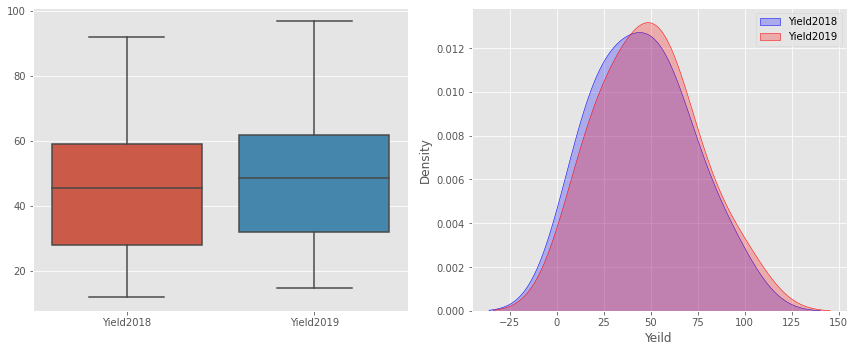

Results, Method: Shapiro-Wilk: ShapiroResult(statistic=0.9669356346130371, pvalue=0.8610707521438599)
Results, Method: Shapiro-Wilk: ShapiroResult(statistic=0.9672076106071472, pvalue=0.8638170957565308)
Results, Method: Wilcoxon: WilcoxonResult(statistic=0.0, pvalue=0.001953125)


In [430]:
#N NON-PARAMETRICS TEST
# T-test are based on assumption that underlying parameters are sampled from a given distribution (NORMAL) hence these are PARAMETRIC TESTS. Non parametric correspondent is Wilcoxon rank-sum test
# Non-parametric version of the paired test (pre-after treatment): Wilcoxon signed-rank

#Wilcoxon signed-rank test for potatos yields
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12,5))
sns.boxplot(data=y, ax=ax[0])
sns.kdeplot(y.Yield2018, shade=True, color='blue', ax=ax[1])
sns.kdeplot(y.Yield2019, shade=True, color='red', ax=ax[1])
ax[1].legend(('Yield2018', 'Yield2019'))
ax[1].set_xlabel('Yeild')
plt.tight_layout()
plt.show()

#Wilcoxon signed-rank test gives less statistical power than t-Student's paired test when the difference between the two distributions is not normally distributed.

print("Results, Method: Shapiro-Wilk: " + str(stats.shapiro(y.Yield2018)))
print("Results, Method: Shapiro-Wilk: " + str(stats.shapiro(y.Yield2019)))
print("Results, Method: Wilcoxon: " + str(stats.wilcoxon(y.Yield2019,y.Yield2018)))

<AxesSubplot:ylabel='Density'>

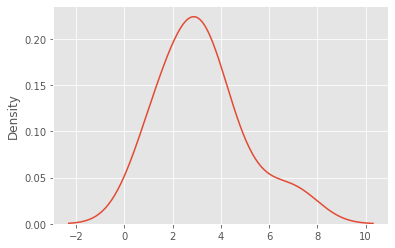

In [433]:
delta=y.Yield2019-y.Yield2018
sns.kdeplot(delta)

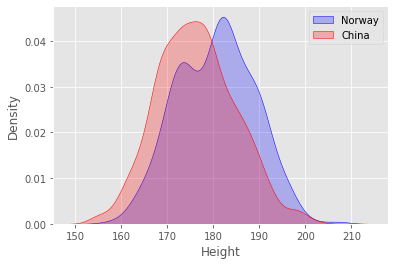

Normality test of the two distributions
Method Shapiro-Wilk Test, Norway ShapiroResult(statistic=0.9905338287353516, pvalue=0.020431291311979294)
Method Shapiro-Wilk Test, China ShapiroResult(statistic=0.9928457140922546, pvalue=0.00020077938097529113)
Non normal. To test the difference we run the Wilcoxon-rank sum:
RanksumsResult(statistic=11.42142282380248, pvalue=3.268387665531508e-30)


In [441]:
# Separate the heights by country
N = A[A['Team'] == "Norway"].Height
C = A[A['Team'] == "China"].Height

sns.kdeplot(N, shade=True, color='blue')
sns.kdeplot(C, shade=True, color='red')
plt.legend(('Norway', 'China'))
plt.xlabel('Height')
plt.show()

print("Normality test of the two distributions")

print("Method Shapiro-Wilk Test, Norway " + str(stats.shapiro(N.dropna())))
print("Method Shapiro-Wilk Test, China " + str(stats.shapiro(C.dropna())))

print("Non normal. To test the difference we run the Wilcoxon-rank sum:")
wilc = stats.ranksums(N, C)
print(wilc)

In [444]:
#O ARE TWO SAMPLES ORIGINATE FROM THE SAME DISTRIBUTION? >> Kruskal-Wallis H Test
# Two independent samples with same or different size. The parametric version is the one-way ANOVA (this last assumes normality in the residuals).
#stat, p = stats.kruskal(US_Sex_ratio, EU_Sex_ratio, CA_Sex_ratio) 
# H_0: from same distribution

stats.kruskal(N.dropna(),C.dropna())
# p_value < alpha >> Reject NULL >> The two samples comes from different distributions

KruskalResult(statistic=60.887401914931374, pvalue=6.043434570287168e-15)

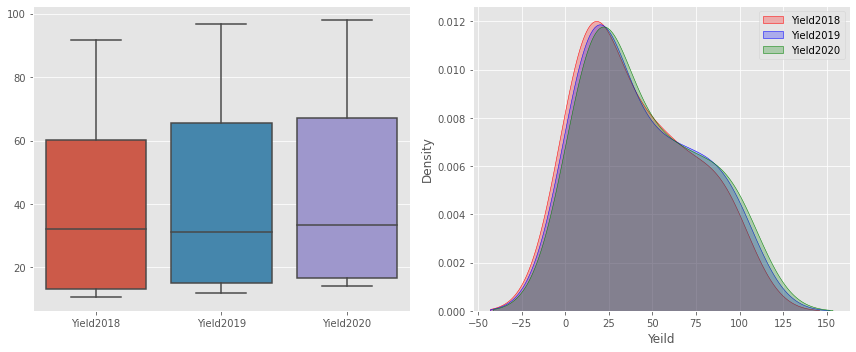

Are 3 samples coming from the same distribution?, H_0 yes


FriedmanchisquareResult(statistic=27.5593220338983, pvalue=1.0364998840378655e-06)

In [448]:
# Friedman test - Non parametrics assessment of different in treatments across multiple attempts.
# Control group + DIfferent treatment groups.

yields2018 = [60.2, 12.0, 13.8, 91.8, 50.0, 45.0, 32.0, 87.5, 60.1, 88.0, 11.3, 10.7, 12.7, 15.9, 16.0]
yields2019 = [63.2, 15.6, 14.8, 96.7, 53.0, 47.0, 31.3, 89.8, 67.8, 90.0, 14.2, 12.0, 13.9, 17.8, 20.0]
yields2020 = [65.2, 17.2, 15.5, 97.9, 55.5, 47.0, 33.5, 91.2, 68.8, 95.0, 16.1, 14.0, 14.1, 19.9, 24.0]


y = pd.DataFrame({'Yield2018': yields2018,
                            'Yield2019' : yields2019,
                            'Yield2020' : yields2020})



fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12,5))
sns.boxplot(data=y, ax=ax[0])
sns.kdeplot(y.Yield2018, shade=True, color='r', ax=ax[1])
sns.kdeplot(y.Yield2019, shade=True, color='b', ax=ax[1])
sns.kdeplot(y.Yield2020, shade=True, color='g', ax=ax[1])

ax[1].legend(('Yield2018', 'Yield2019', 'Yield2020'))
ax[1].set_xlabel('Yeild')
plt.tight_layout()
plt.show()

print("Are 3 samples coming from the same distribution?, H_0 yes")
stats.friedmanchisquare(y.Yield2018, y.Yield2019, y.Yield2020)

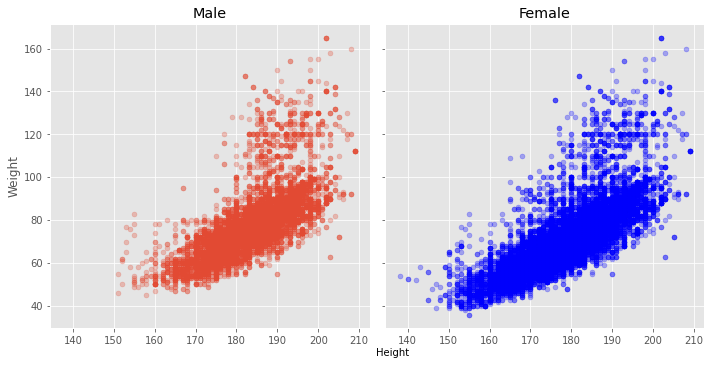

Pearson, M: (0.7032948916719352, 3.346026522512088e-142)
Spearman, M: SpearmanrResult(correlation=0.7754281068230217, pvalue=6.845437415888625e-191)
Pearson, F: (0.8032056785599646, 0.0)
Spearman, F: SpearmanrResult(correlation=0.8611034583159584, pvalue=0.0)


In [480]:
#Q NON-PARAMETRIC CORRELATION

#Spearman correlation: how well the relationship between two variables can be described using a MONOTONIC FUNCTION? Spearman assesses any MONOTONIC correlation (linear and non linear), whereas Pearson assesses
#only linear correlations.  

since2000 = A[A.Year >= 2000]
M = since2000[A.Sex >= 'M']
F = since2000[A.Sex >= 'F']

fig,ax=plt.subplots(1,2, sharex=True,sharey=True,figsize=(10,5))
ax[0].scatter(M.Height,M.Weight,s=25, alpha=0.3)
ax[1].scatter(F.Height,F.Weight,color='b',s=25, alpha=0.3)

ax[0].set_title("Male")
ax[1].set_title("Female")

ax[0].set_ylabel("Weight")


fig.text(0.55, 0.001, 'Height', ha='center')
plt.tight_layout()
plt.show()


print("Pearson, M: " + str(stats.pearsonr(M.dropna().Weight,M.dropna().Height)))
print("Spearman, M: " + str(stats.spearmanr(M.dropna().Weight,M.dropna().Height)))
print("Pearson, F: " + str(stats.pearsonr(F.dropna().Weight,F.dropna().Height)))
print("Spearman, F: " + str(stats.spearmanr(F.dropna().Weight,F.dropna().Height)))

KendalltauResult(correlation=0.7333333333333333, pvalue=0.002212852733686067)

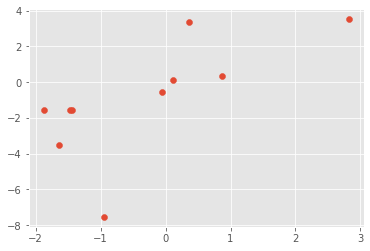

In [485]:
#R Kendall Rank Correlation - As Spearman but small sized sample -> calculation based on concordant and discordant pairs. [H_0: Independence]
data1 = [0.873, 2.817, 0.121, -0.945, -0.055, -1.436, 0.360, -1.478, -1.637, -1.869]
data2 = [0.353, 3.517, 0.125, -7.545, -0.555, -1.536, 3.350, -1.578, -3.537, -1.579]

plt.scatter(data1,data2)
stats.kendalltau(data1, data2)

In [ ]:
#Source: https://goldinlocks.github.io/Basic-Experimental-Design-in-Python/#Chi-Squared-Test

In [ ]:
#This is the end of the file